In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
postulantes_educacion = pd.read_csv('Data/fiuba_1_postulantes_educacion.csv')

In [3]:
postulantes_genero_edad = pd.read_csv('Data/fiuba_2_postulantes_genero_y_edad.csv')

In [4]:
vistas = pd.read_csv('Data/fiuba_3_vistas.csv')

In [5]:
postulaciones = pd.read_csv('Data/fiuba_4_postulaciones.csv')

In [6]:
avisos_online = pd.read_csv('Data/fiuba_5_avisos_online.csv')

In [29]:
avisos_detalle = pd.read_csv('Data/fiuba_6_avisos_detalle.csv')

# Trabajando con el dataset de postulantes_educacion

In [8]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [8]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [9]:
postulantes_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [10]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [11]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [36]:
avisos_detalle["nombre_area"].value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Otros                                     153
Marketing                                 153
Administración de Personal                152
Recepcionista                             151
Transporte                        

In [41]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [37]:
pd.options.display.max_colwidth = 10000

In [43]:
avisos_detalle["titulo"][2000:4000]

2000                                                         Operarios de Carga y Descarga  - Zona CABA
2001                                                                                Vendedor/a de Salón
2002                                                               Gerente Comercial  de Consumo Masivo
2003    Jefe- Responsable y 2do de Cocina para emprendimiento gastronómico en la localidad de Temperley
2004                                   Jefe de Ventas Nacional para pyme industrial en San Martín, GBA.
2005                                                                                     Jefe de Ventas
2006                                                                       Gestor de Reclamos- San Juan
2007                                                              Empleda Administrativa - Zona Burzaco
2008                                                L - Operarios de Depósito / Zona Esteban Echeverría
2009                                   Empleada/o Administrativa

In [10]:
postulantes_educacion["nombre"].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [31]:
lista_palabras_chotas = ["</p>","<strong>","<p>","</strong>","<br />","<ul>","<li>"]
avisos_detalle['descripcion'].replace(regex=True,inplace=True,to_replace=lista_palabras_chotas,value=r' ')


In [39]:
avisos_detalle["descripcion"][2000:4000]

2000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [35]:
avisos_detalle[]

idaviso                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [11]:
postulantes_educacion["estado"].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [12]:
postulantes_educacion["idpostulante"].value_counts()

YlMLGD     9
EZD29      8
54MQGz     8
xk9VKeV    7
Ez0LBk9    7
8keBRO     7
9692125    7
12eO0B     7
8KOd6x     7
YNVjEr     7
55R18N     7
8M21pBL    7
aa1KkD     7
Ee2ok0     7
1BodWQ     7
zv8vOxE    7
kPNrbZV    7
0zdoVvY    6
2zLX4QY    6
aweLqm     6
mzbe3W3    6
638ZEM     6
E6O3A0     6
dYje0Nb    6
8AZKkO     6
dYoxVMa    6
mzG1Q59    6
Dr65M1P    6
e9BNrp     6
19YpDQ     6
          ..
96Xb5lp    1
QNr3Blo    1
MVPr5wv    1
owzx8GW    1
evXZmB     1
xkPKVJj    1
96zYQEa    1
EBORwo     1
Z21965     1
PmGKoXY    1
8QBP0x     1
5rz4Xp     1
Ym1v2D     1
akjM4kN    1
W9VLBza    1
JBxE2ep    1
JBrNXA3    1
qe2WJKw    1
vVj8aqj    1
8MBAAKO    1
xkdZRE0    1
0zP3Pl8    1
ZRK1VY     1
qevAde1    1
lDLaON1    1
akRppdq    1
2zPD3Bx    1
Oqr9lOr    1
6r5vdKr    1
MV6e81v    1
Name: idpostulante, Length: 188752, dtype: int64

# Graficos que muestre las cantidades

Text(0,0.5,'Nivel de estudio')

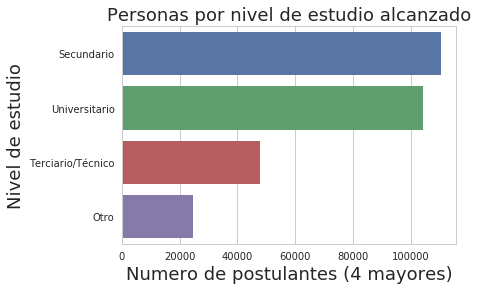

In [13]:
nombres_counts = postulantes_educacion["nombre"].value_counts()[:4]

grafico = sns.barplot(x=nombres_counts.values, y=nombres_counts.index, orient='h')
grafico.set_title("Personas por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes (4 mayores)",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

Text(0,0.5,'Nivel de estudio')

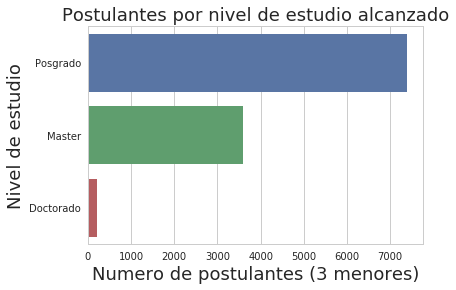

In [14]:
nombres_counts = postulantes_educacion["nombre"].value_counts()[4:]

grafico = sns.barplot(x=nombres_counts.values, y=nombres_counts.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes (3 menores)",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

Text(0,0.5,'Nivel de estudio y estado en el que está')

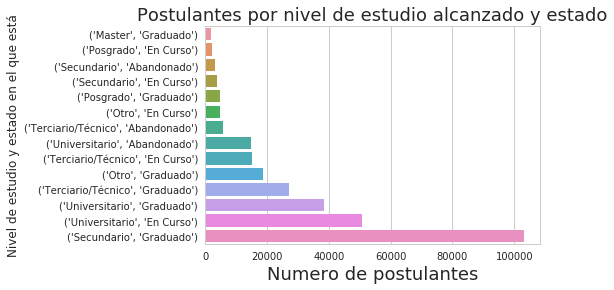

In [15]:
asd = postulantes_educacion.groupby(["nombre","estado"]).size().sort_values()[7:]

grafico = sns.barplot(x=asd.values, y=asd.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado y estado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio y estado en el que está", fontsize=12)

Text(0,0.5,'Nivel de estudio')

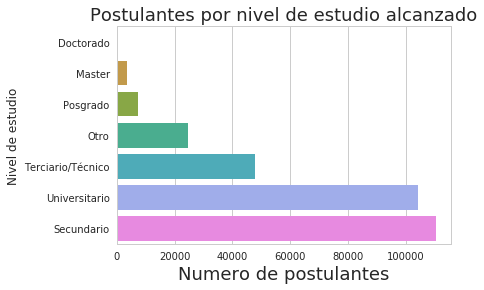

In [16]:
asd = postulantes_educacion.groupby(["nombre"]).size().sort_values()

grafico = sns.barplot(x=asd.values, y=asd.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=12)

Text(0,0.5,'Cantidad de postulantes')

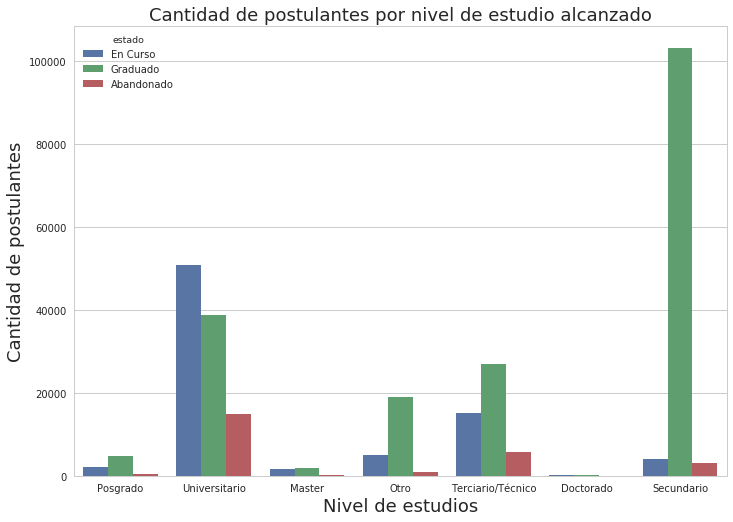

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="nombre", hue="estado", data=postulantes_educacion, ax=ax)
g.set_title("Cantidad de postulantes por nivel de estudio alcanzado", fontsize=18)
g.set_xlabel("Nivel de estudios", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)


 # Trabajando con el dataset postulantes_genero_edad

In [18]:
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


### Voy a hacer un merge con el anterior dataset para sacar algunas relaciones

In [19]:
postulantes_merge = pd.merge(postulantes_educacion,postulantes_genero_edad,how = 'inner',on = 'idpostulante')

In [20]:
postulantes_merge['sexo'].value_counts()

FEM           156968
MASC          137828
NO_DECLARA      3435
Name: sexo, dtype: int64

In [21]:
#Voy a agregar una columna con la edad ya calculada(estimando por 2017-año nacimiento) para cada registro
postulantes_merge["año"] = postulantes_merge[postulantes_merge["fechanacimiento"].notnull()]\
        ["fechanacimiento"].apply(lambda x: x[0:4])
postulantes_merge["edad"] = postulantes_merge[postulantes_merge["año"].notnull()] \
        ["año"].apply(lambda x: 2017 - int(x))

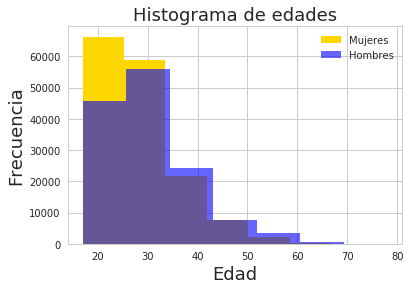

In [22]:
edades_sin_outsiders = postulantes_merge[(16 < postulantes_merge["edad"]) & (postulantes_merge["edad"] < 80)]
hombres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "MASC"]
mujeres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "FEM"]

g = mujeres["edad"].plot.hist(color='gold',bins=7)
g = hombres["edad"].plot.hist(color='blue',alpha=0.6,bins=7)
g.set_title("Histograma de edades", fontsize=18)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)
g.legend(["Mujeres","Hombres"])

# ¿Que genero tiene mejor nivel de estudios?

Text(0,0.5,'Nivel de estudio')

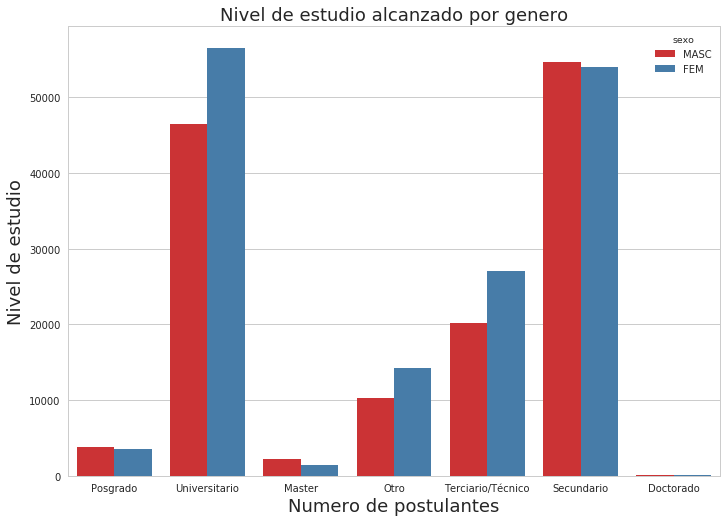

In [23]:
dato = postulantes_merge[postulantes_merge["sexo"] != "NO_DECLARA"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


grafico = sns.countplot(x="nombre", hue="sexo",data=dato, ax=ax,palette='Set1')
grafico.set_title("Nivel de estudio alcanzado por genero", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

#NO SE COMO MIERDA INVERTIR LOS COLORESSSSSSSS

Text(0,0.5,'Cantidad de postulantes')

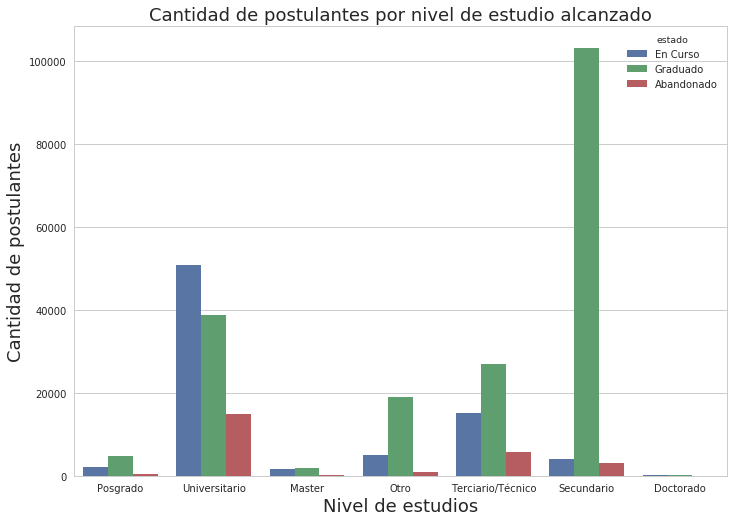

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="nombre", hue="estado", data=postulantes_merge, ax=ax)
g.set_title("Cantidad de postulantes por nivel de estudio alcanzado", fontsize=18)
g.set_xlabel("Nivel de estudios", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

#Es el mismo que hay un poco mas arriba.....

Text(0,0.5,'Edad')

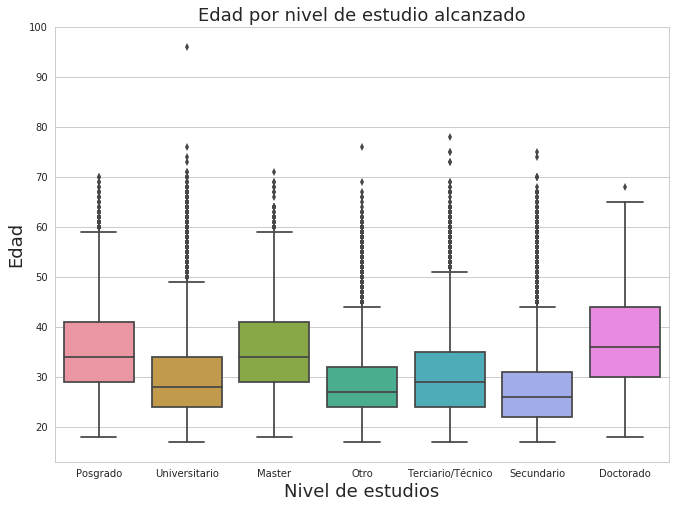

In [25]:
asd = postulantes_merge[(16 < postulantes_merge["edad"]) & (postulantes_merge["edad"] < 100)]
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)


grafico = sns.boxplot(x="nombre", y="edad",data=asd, ax=ax)
grafico.set_title("Edad por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Nivel de estudios",fontsize=18)
grafico.set_ylabel("Edad", fontsize=18)

In [26]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


# Trabajando con el dataset de vistas

In [27]:
vistas.rename(index=str, columns={"idAviso": "idaviso", "timestamp": "timestamp", "idpostulante": "idpostulante"},inplace=True)
vistas_detalle_merge = pd.merge(vistas,avisos_detalle,on="idaviso",how="inner")

Text(0,0.5,'Vistas')

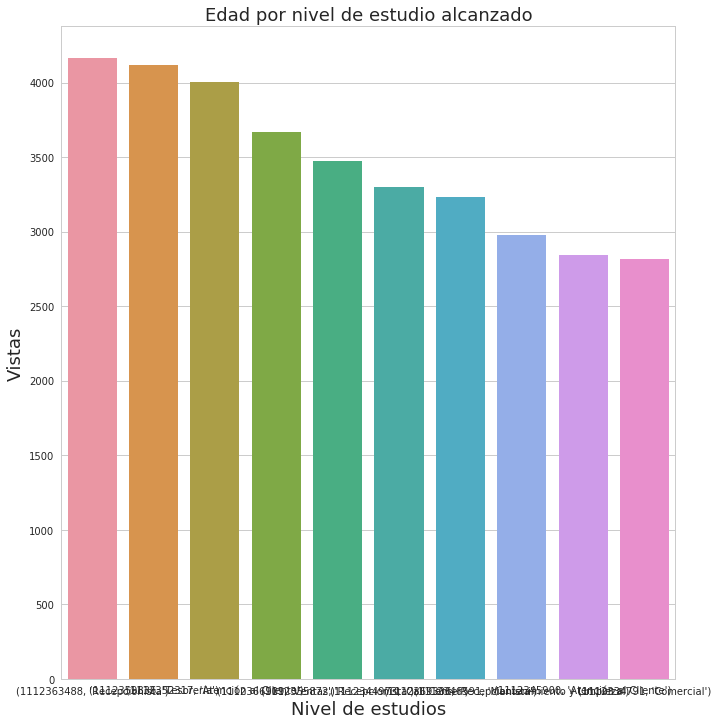

In [28]:
#Hago un top 10 de los avisos por nombre area con mas visitas
avisos_nombre_area_mas_visitas = vistas_detalle_merge.groupby(["idaviso","nombre_area"]).size()\
    .sort_values(ascending=False)[0:10]

fig, ax = plt.subplots()
fig.set_size_inches(11.0, 12.0)


grafico = sns.barplot(x=avisos_nombre_area_mas_visitas.index, y=avisos_nombre_area_mas_visitas.values \
                      ,orient="v",ax=ax)
grafico.set_title("Edad por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Nivel de estudios",fontsize=18)
grafico.set_ylabel("Vistas", fontsize=18)

In [29]:
avisos_nombre_area_mas_visitas

idaviso     nombre_area             
1112363488  Recepcionista               4169
1112359836  Tesorería                   4120
1112352317  Atención al Cliente         4003
1112366909  Ventas                      3669
1112355872  Recepcionista               3472
1112344973  Call Center                 3299
1112369306  Recepcionista               3236
1112346591  Mantenimiento y Limpieza    2979
1112345900  Atención al Cliente         2841
1112334791  Comercial                   2817
dtype: int64